# Grover's Algorithm in Qiskit

#### Importing relevant libraries

In [1]:
from qiskit import QuantumCircuit, IBMQ
import math
from qiskit import Aer
# Run the quantum circuit on a statevector simulator backend

import numpy as np
from qiskit import *
%matplotlib inline
pi = math.pi

#### Functions built in Qiskit that separate different parts of the Grover's Algorithm

In [2]:
def prepare_states(circ):
    '''
        Function for preparing the states in the circuit
    '''
    circ.h(0)
    circ.h(1)
    circ.h(2)
    circ.h(3)
    
    return circ

In [3]:
def cccz(circ):
    '''
        This function is a replacement for the CCC-Z gate
    '''
    circ.cu1(pi/4, 0, 3)
    circ.cx(0, 1)
    circ.cu1(-pi/4, 1, 3)
    circ.cx(0, 1)
    circ.cu1(pi/4, 1, 3)
    circ.cx(1, 2)
    circ.cu1(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cu1(pi/4, 2, 3)
    circ.cx(1, 2)
    circ.cu1(-pi/4, 2, 3)
    circ.cx(0, 2)
    circ.cu1(pi/4, 2, 3)
    
    return circ

In [4]:
def oracle(circ, target_state):
    '''
        This function applies the complete oracle for any given
        target state.

        Based on the given target state, we find the gates where we
        need to apply a NOT gate. 

        For every qubit that is in the 0 state, we need to apply a
        NOT gate on this qubit before and after the CCCZ gate.
       
    '''
    qubits_with_not_gate = []
    
    for i in range(4):
        if int(target_state[i]) == 0:
            qubits_with_not_gate.append(i)
            
    for qubit in qubits_with_not_gate:
        circ.x(qubit)
        
    circ = cccz(circ)
    
    for qubit in qubits_with_not_gate:
        circ.x(qubit)
    
    return circ
    
def Grover(circ):
    '''
        This function implements the Grover Operator
    '''
    
    circ.h(0)
    circ.h(1)
    circ.h(2)
    circ.h(3)

    circ.x(0)
    circ.x(1)
    circ.x(2)
    circ.x(3)
    
    circ = cccz(circ)
    
    circ.x(0)
    circ.x(1)
    circ.x(2)
    circ.x(3)

    circ.h(0)
    circ.h(1)
    circ.h(2)
    circ.h(3)
    
    return circ

In [5]:
def end_circuit(circ):
    '''
        This function end the circuit and measures the results
    '''
    circ.barrier()
    circ.measure(range(4),range(4))
    
    return circ

### Function to simulate the circuit and get results

In [6]:
def simulate_and_get_results(number_of_iterations, target_state):
    '''
        This function simulates and quantum circuit for the specified target state
        and given number of iterations.
    '''
    
    circ = QuantumCircuit(4,4)
    circ = prepare_states(circ)
    
    for i in range(number_of_iterations):
        circ = oracle(circ,target_state)
        circ = Grover(circ)
    
    circ = end_circuit(circ)
    backend = Aer.get_backend('qasm_simulator')
    job = execute(circ, backend, shots=8192)
    result = job.result()
    counts = result.get_counts(circ)
    
    return counts

### Running the Circuit for 2 iterations and target state of '0010'

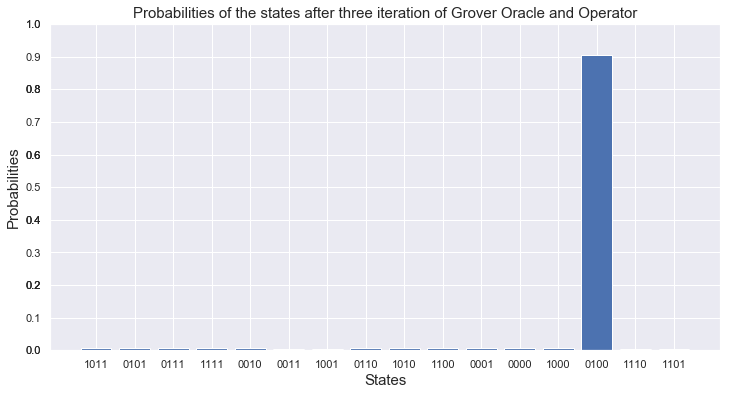

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np

counts = simulate_and_get_results(2, '0010')
total = sum(counts.values())
probabilities = [i/total for i in counts.values()]
x = np.linspace(0,1,21)
x = [round(i,1) for i in x]

plt.figure(figsize=(12,6))
plt.bar(range(1,17), probabilities)
plt.xticks(range(1,17),counts.keys())
plt.yticks(x,x)
plt.title('Probabilities of the states after three iteration of Grover Oracle and Operator', fontsize=15)
plt.xlabel('States', fontsize=15)
plt.ylabel('Probabilities', fontsize=15)
plt.show()


### Drawing the circuit for one iteration of the algorithm with target state as '0010'

In [8]:
circ2 = QuantumCircuit(4,4)
circ2 = prepare_states(circ2)
circ2 = oracle(circ2, '0010')
circ2 = Grover(circ2)
circ2 = end_circuit(circ2)
circ2.draw()